In [1]:
import calour as ca
import calour_utils as cu

/Users/amnon/miniconda3/envs/calour/lib/python3.7/site-packages/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


failed to load logging config file


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
import matplotlib as mpl
import pandas as pd
import scipy as sp;


In [3]:
pwd

'/Users/amnon/git/paper-daycare'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

# Load the (rarified) data

In [7]:
datn = ca.read_amplicon('data/gan-subsampled.biom', 'data/gan-subsampled_sample.txt', min_reads=1000, normalize=None)

2020-08-31 19:11:02 INFO loaded 268 samples, 14052 features
2020-08-31 19:11:02 WARNING Do you forget to normalize your data? It is required before running this function
2020-08-31 19:11:02 INFO After filtering, 268 remain.


### Get rid of features with 0 reads

In [8]:
datn=datn.filter_sum_abundance(0.000001)

2020-08-31 19:11:02 WARNING Do you forget to normalize your data? It is required before running this function
2020-08-31 19:11:02 INFO After filtering, 1294 remain.


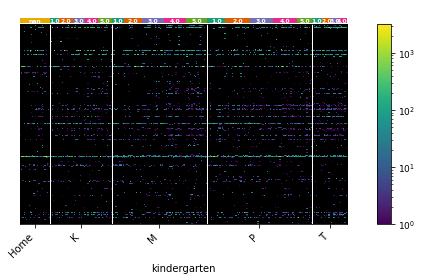

In [9]:
datn.plot(sample_field='kindergarten',barx_fields=['Time'])

# Plot the alpha-diversity plot

AmpliconExperiment with 41 samples, 1294 features
AmpliconExperiment with 54 samples, 1294 features
AmpliconExperiment with 52 samples, 1294 features
AmpliconExperiment with 57 samples, 1294 features
AmpliconExperiment with 40 samples, 1294 features
AmpliconExperiment with 24 samples, 1294 features


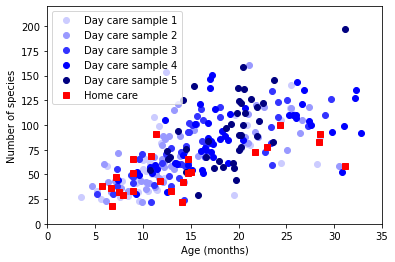

In [10]:
f=plt.figure()
tt=datn.filter_samples('kindergarten',['Home','Family'],negate=True)
tt=tt.filter_samples('Time','1')
print(tt)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies,'o',c=[0.8,0.8,1,1])
tt=datn.filter_samples('Time','2')
print(tt)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies,'o',c=[0.6,0.6,1,1])
tt=datn.filter_samples('Time','3')
print(tt)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies,'o',c=[0.2,0.2,1,1])
tt=datn.filter_samples('kindergarten',['Home','Family'],negate=True)
tt=datn.filter_samples('Time','4')
print(tt)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies,'o',c=[0,0,1,1])
tt=datn.filter_samples('Time','5')
print(tt)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies,'o',c=[0,0,0.5,1])
tt=datn.filter_samples('kindergarten','Home')
print(tt)
plt.plot(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies,'sr')
plt.xlim([0,35])
plt.ylim([0,220])
plt.xlabel('Age (months)')
plt.ylabel('Number of species')
plt.legend(['Day care sample 1','Day care sample 2','Day care sample 3','Day care sample 4','Day care sample 5','Home care'])

In [11]:
f.savefig('figures/fig-alpha-age-scatter.pdf')

# Do age binning and p-value for alpha diversity

In [12]:
def draw_age_alpha_onebar(threshold=0.5):
    '''Draw the per age-bin alpha diversity from home and kindergarten kids, and print the significance
    
    Parameters
    ----------
    threshold: float, optional
        the minimal number of reads for a feature to be defined as present
        
    
    Returns
    f: matplotlib.figure
        the figure with the bar plot
    '''
    f=plt.figure()
    colors=['r']
    colors.extend(list(plt.cm.Blues(np.linspace(0.5,1,5))))
    res=pd.DataFrame(columns=['age','hmean','gmean', 'hstd', 'gstd','agegrp'])
    tt.sample_metadata['numSpecies']=np.sum(tt.data>=threshold,axis=1)
    for cexp in tt.iterate('age_cat_num', axis=0):
        cage_cat_num = cexp.sample_metadata.iloc[0]['age_cat_num']
        cage_cat = cexp.sample_metadata.iloc[0]['age_cat']
        tthome = cexp.filter_samples('kindergarten','Home')
        ttgan = cexp.filter_samples('kindergarten','Home',negate=True)
        alpha_home=np.nanmean(tthome.sample_metadata['numSpecies'])
        alpha_gan=np.nanmean(ttgan.sample_metadata['numSpecies'])
        alpha_home_std=np.nanstd(tthome.sample_metadata['numSpecies']) / np.sqrt(len(tthome.sample_metadata))
        alpha_gan_std=np.nanstd(ttgan.sample_metadata['numSpecies']) / np.sqrt(len(ttgan.sample_metadata))
        print('age %s, home: %f, gan: %f' % (cage_cat, alpha_home, alpha_gan))
        print(sp.stats.mannwhitneyu(tthome.sample_metadata['numSpecies'],ttgan.sample_metadata['numSpecies']))
        print('gan %d samples, home %d samples' % (len(ttgan.sample_metadata), len(tthome.sample_metadata)))
        plt.bar(cage_cat_num, alpha_home, yerr=alpha_home_std, width=1.5, color=colors[0])
        plt.bar(cage_cat_num+1.5, alpha_gan, yerr=alpha_gan_std, width=1.5, color=colors[1])
    plt.ylim([0,120])
    plt.xlim([8,34])
    plt.legend(['Home care','Day care'],loc='upper left')
    plt.xticks(res['age']+1,res['agegrp'])
    plt.ylabel('number of species')
    return f

### Add age bin (0-5, 5-10 months etc.) to each sample

In [13]:
tt=cu.numeric_to_categories(datn,'age_months','age_cat',np.arange(0,35,5),inplace=False)

### Get rid of timepoint1 samples (since did not have time to mingle in the kindergarten)

In [14]:
tt=tt.filter_samples('Time',['1'],negate=True)

age 10-15, home: 52.111111, gan: 66.227273
MannwhitneyuResult(statistic=194.0, pvalue=0.04727480235420328)
gan 66 samples, home 9 samples
age 5-10, home: 38.888889, gan: 44.166667
MannwhitneyuResult(statistic=83.5, pvalue=0.16572484031615337)
gan 24 samples, home 9 samples
age >30, home: 77.333333, gan: 110.000000
MannwhitneyuResult(statistic=7.5, pvalue=0.013081168874240927)
gan 26 samples, home 3 samples
age 20-25, home: 83.666667, gan: 105.600000
MannwhitneyuResult(statistic=21.5, pvalue=0.04927990962649401)
gan 35 samples, home 3 samples
age 15-20, home: nan, gan: 88.647059
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
gan 51 samples, home 0 samples
age 0-5, home: nan, gan: 38.000000
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
gan 1 samples, home 0 samples


/Users/amnon/miniconda3/envs/calour/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/amnon/miniconda3/envs/calour/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amnon/miniconda3/envs/calour/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/amnon/miniconda3/envs/calour/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/amnon/miniconda3/envs/calour/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/amnon/miniconda3/envs/calour/lib/python3.7/site-packages/scipy/stats/stats.py:7039: Runtime

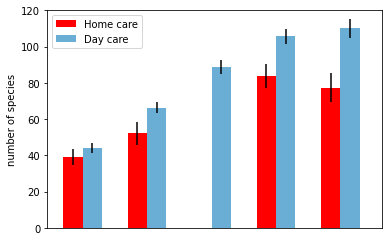

In [15]:
f = draw_age_alpha_onebar()

In [16]:
f.savefig('./figures/alpha-barplot-age.pdf')

# Look at correlation between age and alpha-diversity

### Day-care

In [88]:
tt=datn.filter_samples('kindergarten',['Home'],negate=True)

In [23]:
sp.stats.pearsonr(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies)

(0.6568101858421098, 1.665302212432151e-31)

In [24]:
sp.stats.spearmanr(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies)

SpearmanrResult(correlation=0.7135679076590864, pvalue=2.8584566268851685e-39)

In [25]:
sp.stats.linregress(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies)

LinregressResult(slope=3.4150516305681204, intercept=22.416708202325346, rvalue=0.6568101858421097, pvalue=1.665302212432312e-31, stderr=0.2520306064552797)

### Home-care

In [26]:
tth=datn.filter_samples('kindergarten',['Home'])

In [28]:
sp.stats.pearsonr(tth.sample_metadata.age_months,tth.sample_metadata.numSpecies)

(0.6557856666148296, 0.0005031394010228298)

In [29]:
sp.stats.spearmanr(tth.sample_metadata.age_months,tth.sample_metadata.numSpecies)

SpearmanrResult(correlation=0.6467901269680167, pvalue=0.0006367271069671814)

In [30]:
sp.stats.linregress(tth.sample_metadata.age_months,tth.sample_metadata.numSpecies)

LinregressResult(slope=1.9812999835675966, intercept=25.74642133292861, rvalue=0.6557856666148295, pvalue=0.0005031394010228309, stderr=0.4862879523285379)

# Calculate the p-value for the slope difference
## Using random permutations of the kindergarten/home labels

In [89]:
def get_slope_pval(exp, num_perm=1000):
    '''Get the slope p-value using random label permutations
    
    Parameters
    ----------
    exp: calour.Experiment
        The experiment to test
    num_perm: int, optional
        Number of permutations to test
    
    Returns:
    res: list of float
        The slope difference for each iteration.
        NOTE: res[0] is without permutation, res[1:-1] are the permuted results
    '''
    res = []
    np.random.seed(2020)
    cexp = exp.copy()
    for cperm in range(num_perm):
        # calculate the slopes
        tt=cexp.filter_samples('kindergarten',['Home'],negate=True)
        dc=sp.stats.linregress(tt.sample_metadata.age_months,tt.sample_metadata.numSpecies)
        tth=cexp.filter_samples('kindergarten',['Home'])
        hc=sp.stats.linregress(tth.sample_metadata.age_months,tth.sample_metadata.numSpecies)
        res.append(dc.slope-hc.slope)
        # permute the kindergarten labels
        cexp.sample_metadata['kindergarten']=cexp.sample_metadata['kindergarten'].sample(frac=1).values
    print('orig_diff: %f' % res[0])
    num_big = np.sum(np.abs(res)>=res[0])
    print('pval: %d/%d=%f' % (num_big, len(res), num_big/len(res) ))
    num_ss = np.sum(res>=res[0])
    print('single sided pval: %d/%d=%f' % (num_ss, len(res), num_ss/len(res) ))
    return res

In [85]:
b=get_slope_pval(datn,5000)

orig_diff: 1.433752
pval: 659/5000=0.131800
single sided pval: 284/5000=0.056800


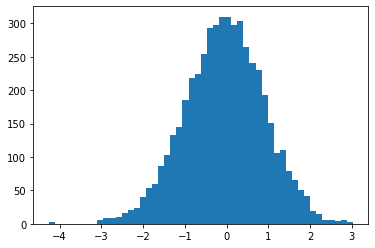

In [86]:
plt.figure()
_=plt.hist(b,50)